In [1]:
import pandas as pd
import numpy as np

In [2]:
from geoprocessing import Disaster, TweetRaster

In [3]:
raster = TweetRaster(resolution=1000000)

In [4]:
raster.load_tweets('data/tweets.csv', longitude_column='lng', latitude_column='lat', crs=4326)

In [5]:
# raster.geocode_disaster_dataset('data/disasters.csv', longitude_column='Longitude', latitude_column='Latitude')

In [6]:
raster.load_disasters('data/disasters_geocoded.csv', longitude_column='Longitude', latitude_column='Latitude')

In [7]:
raster.select_most_active_pixels(64)

In [8]:
raster.create_training_data(28, 28, write_file=True)

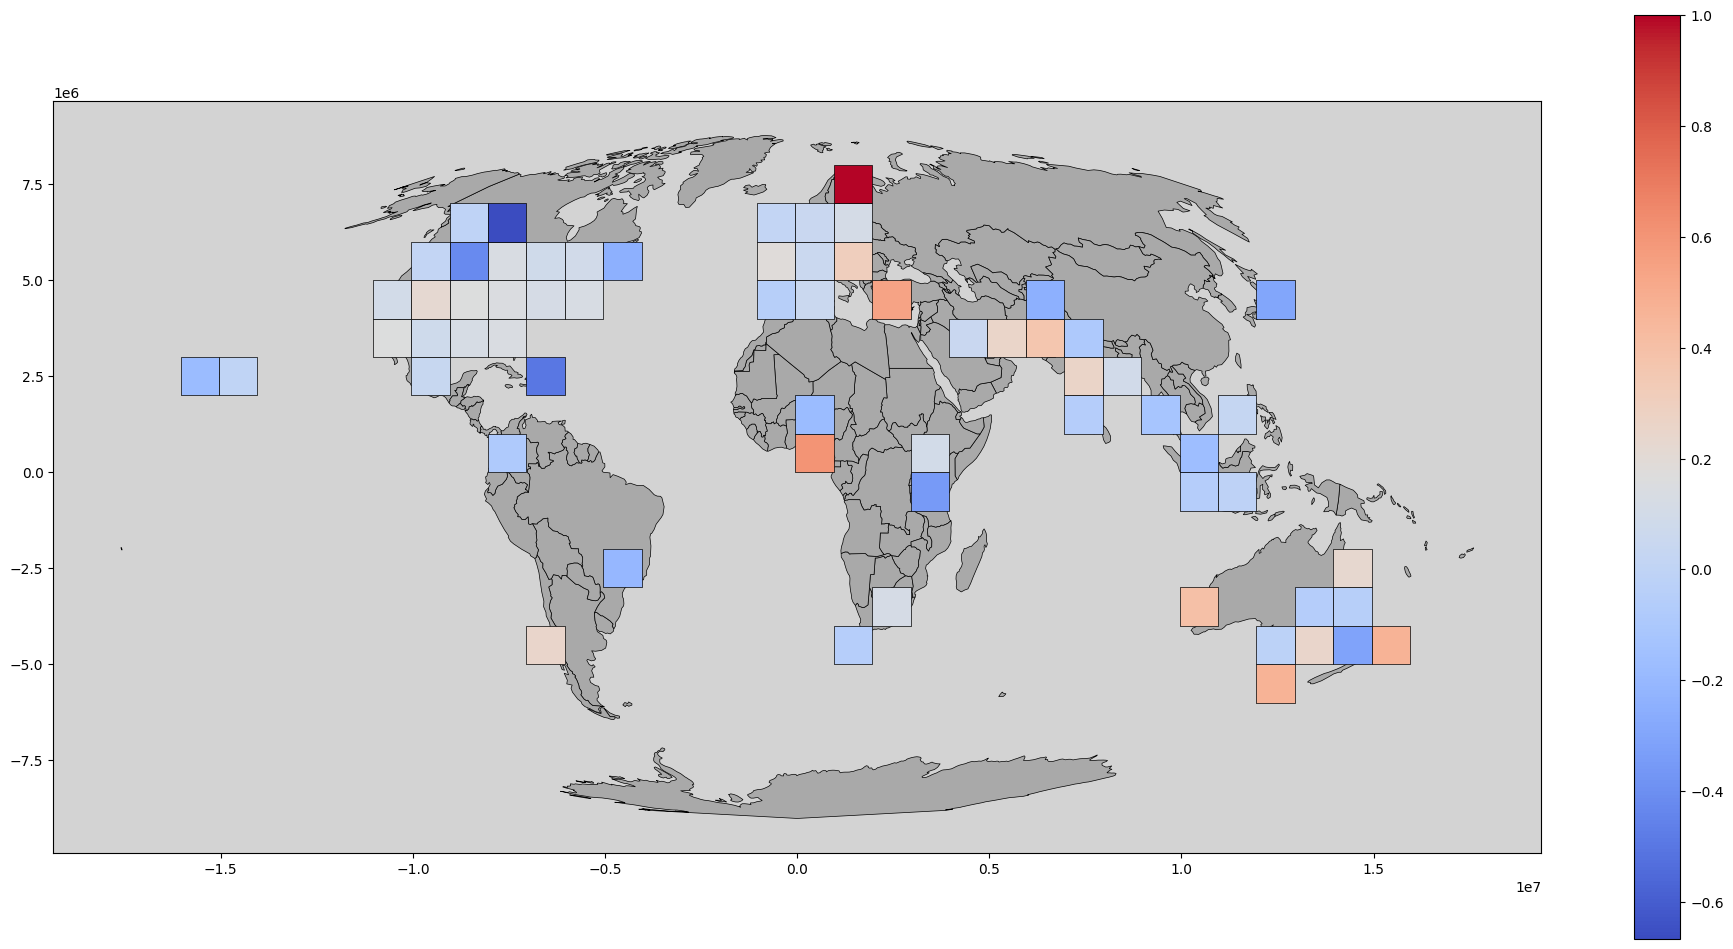

In [11]:
raster.plot_values(raster.training_data[28, 28][2000][1], 'stance_diff')